In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style



In [2]:
def read_dataset(path, name):
    df = pd.read_csv(path + name, header=None)
    return df

In [3]:
def initialize_membership_matrix(df, k):
    membership_matrix = np.random.dirichlet(np.ones(k),size=len(df))
    df_membership_matrix = pd.DataFrame(membership_matrix)
    return df_membership_matrix

In [4]:
def find_centroids(df, k, membership_matrix, m):
    centroids = np.zeros((k, len(df.columns)))

    for i in range(k):
        sum_membership = sum(np.power(membership_matrix[i], m))
        for j in range (len(df.columns)):
            c = sum(np.multiply(np.power(membership_matrix[i], m), df[j]))/sum_membership
            centroids[i, j] = c

    return centroids    

In [5]:
def calculate_membership_matrix(df, centroids):
    m = 2
    EuclidianDistance = pd.DataFrame()
    inverse_EuclidianDistance = pd.DataFrame()
    membership_matrix = pd.DataFrame()
    for i in range(0, len(centroids)):
        x = 0
        for j in range(0, len(df.columns)):
            x = np.add(x, np.power((df.iloc[ : , j] - centroids[i,j]), 2))
        x = np.sqrt(x)
        EuclidianDistance[len(EuclidianDistance.columns)] = x

    inverse_EuclidianDistance = np.power((1 / EuclidianDistance), 1/(m-1))
    sum = inverse_EuclidianDistance.sum(axis=1)

    for i in range(len(centroids)):
        membership_matrix[len(membership_matrix.columns)] = 1 / np.power(EuclidianDistance[i], 1/(m-1))  / sum

    return membership_matrix   

In [6]:
def c_means(df, k, max_it):
    #initialing weights randomly
    membership_matrix = initialize_membership_matrix(df, k)
    centroids = np.zeros((k, len(df.columns)))
    for i in range(max_it):
        temp_centroids = find_centroids(df, k, membership_matrix, 2)
        # print(np.array_equal(centroids, temp_centroids))
        if np.array_equal(centroids, temp_centroids):
            # print("clustering finished, it", i)
            minvalue_series = membership_matrix.idxmin(axis = 1)
            return centroids, membership_matrix, minvalue_series
        centroids = temp_centroids
        membership_matrix = calculate_membership_matrix(df, centroids)

    minvalue_series = membership_matrix.idxmax(axis = 1)
    return centroids, membership_matrix, minvalue_series

In [11]:
#Calculate cost
def cost_calculate(df, centroids, membership_matrix):
    m = 2
    EuclidianDistance = pd.DataFrame()
    cost = 0
    
    for i in range(0, len(centroids)):
        x = 0
        for j in range(0, len(df.columns)):
            x = np.add(x, np.power((df.iloc[ : , j] - centroids[i,j]), 2))
        x = np.sqrt(x)
        EuclidianDistance[len(EuclidianDistance.columns)] = x
    # print(EuclidianDistance)
    # print(membership_matrix)
    cost = ((np.multiply(EuclidianDistance, membership_matrix).sum(axis=1)/len(df.columns)).sum())/len(df)
    # print(cost)
    return cost



In [8]:
def plot_cost(df, k):
    axis = []
    k_list = []
    for i in range(1,k + 1):
        
        centroids, membership_matrix, minvalue_seri = c_means(df, i, 500)
        cost = cost_calculate(df, centroids, membership_matrix)      

        axis.append(cost)
        k_list.append(i)
    #plot
    plt.plot(k_list, axis, label = "MAE")
    plt.show()

In [9]:
our_datasets = []
our_datasets.append(read_dataset("datasets/", "data1.csv")) 
our_datasets.append(read_dataset("datasets/", "data2.csv"))
our_datasets.append(read_dataset("datasets/", "data3.csv"))
our_datasets.append(read_dataset("datasets/", "data4.csv"))

In [13]:
plot_cost(our_datasets[0], 5)

ValueError: too many values to unpack (expected 3)

clustering finished, it 1


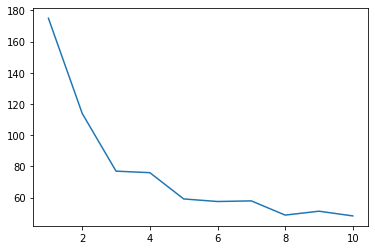

In [12]:
plot_MAE(our_datasets[0], 10)

clustering finished, it 2


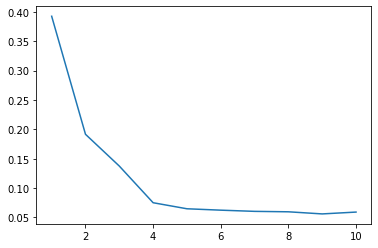

In [13]:
plot_MAE(our_datasets[1], 10)

In [14]:
k = 3
lables = c_means(df, k, 200)
df_clustered = df.copy()       
df_clustered.loc[:, "Cluster"] = lables
print(df_clustered)

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = df[0], y = df[1], s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()




NameError: name 'df' is not defined

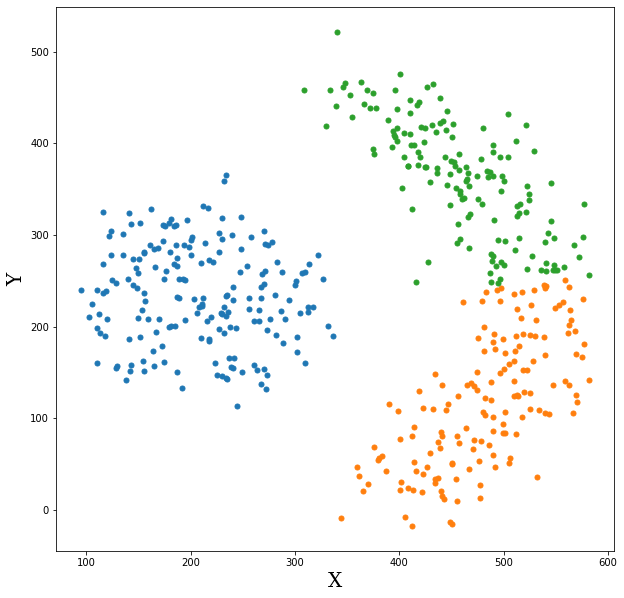

In [11]:
groups = df_clustered.groupby("Cluster")
fig, ax = plt.subplots(figsize=(10, 10))

font1 = {'family':'serif','color':'black','size':20}

plt.xlabel("X", fontdict = font1)
plt.ylabel("Y", fontdict = font1)

for name, group in groups:
     plt.plot(group[0], group[1], marker=".", markersize=10, linestyle="", label="Cluster")

# plt.title('K-mean clustering, ' + 'K = '+str(k), fontdict = font1)



plt.show()
